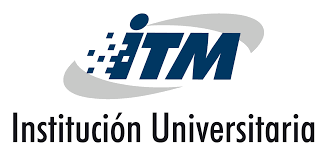

#ITM - Institución Universitaria
#Tema: Aprendizaje supervisado - Deep Learning
#Juan Carlos Briñez de León

# Clase 8: Aplicaciones de Deep Learning (Redes convolucionales).

# Convolutional Neural Network

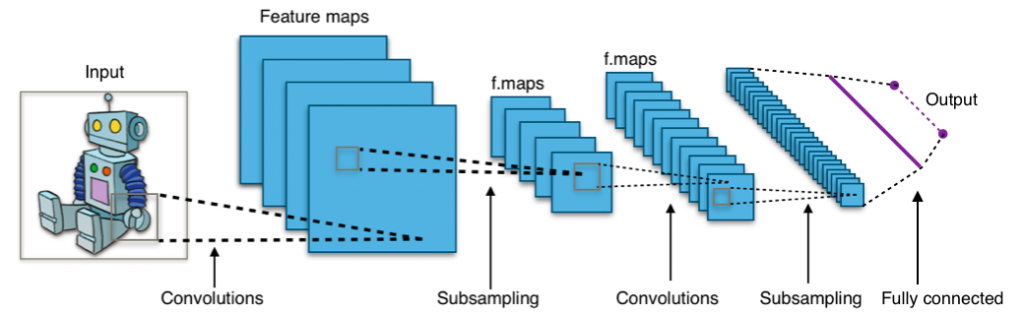

Tensorflow framework documentation [here](https://www.tensorflow.org/) \
Pytorch framework documentation [here](https://pytorch.org/tutorials/) \
Keras framework documentation [here](https://keras.io/)

##0. Conectando el drive  - MNIST

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##1. Cargando librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

##2. Cargando dataset - [MNIST](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)

In [ ]:
# Configuration options
num_classes = 10

In [ ]:
#Cargando datos MNIST  (Todas las imágenes dentro de un archivo plano)
dataset_tr = pd.read_csv(r'/content/drive/MyDrive/Ponencia IA/Material de apoyo/7. Deep Learning 1/mnist_train.csv')
dataset_tr = np.array(dataset_tr)
dataset_ts = pd.read_csv(r'/content/drive/MyDrive/Ponencia IA/Material de apoyo/7. Deep Learning 1/mnist_test.csv')
dataset_ts = np.array(dataset_ts)

In [ ]:
# Dividiendo entradas y salidas
X_train = dataset_tr[:,1:]
Y_train = dataset_tr[:,0]
X_test = dataset_ts[:,1:]
Y_test = dataset_ts[:,0]
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Visualize a grid of samples
grid_size = (5, 5)

_, axes = plt.subplots ( grid_size[0] , grid_size[1] , figsize=(12,12))
axes = axes.ravel()

for i, ax in enumerate(axes):
  Imagen=X_train[i,:]
  Imagen=Imagen.reshape((28,28))
  ax.imshow(Imagen , cmap='gray')
  ax.set_axis_off()


In [ ]:
## Reshape the data to 28 x 28 x 1 pixels
X_train = X_train.reshape([-1,28,28,1]).astype(float)
X_test = X_test.reshape([-1,28,28,1]).astype(float)

# Convert into 0 - 1 values
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = ( X_train.shape[1:] )
print(f'Image shape: {input_shape}')

In [ ]:
# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
print(Y_train.shape)

##3. Creando el modelo profundo (Capas *convolucionales*)


In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D( 32 , kernel_size = (3,3) , activation = "relu" , padding = "same", input_shape = input_shape ))
model.add(MaxPooling2D(pool_size = (2,2) ))
model.add(Conv2D( 64 , kernel_size = (3,3) , activation = "relu", padding = "same" ))
model.add(MaxPooling2D(pool_size = (2,2) ))
model.add(Flatten ())
model.add(Dropout(0.5))
model.add(Dense( num_classes , activation = "softmax" ))

model.summary()

Entrenando el modelo: Define loss function and optimizer [Información](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [ ]:
# Configure the model and start training
model.compile(optimizer="Adam", loss="mse", metrics=["mae", "acc"] )
history = model.fit( X_train, Y_train, epochs = 5 , batch_size = 100 , verbose = 1, validation_split = 0.1 )

Graficando resultados

In [ ]:
# Plot progress (loss function)
_, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot( history.history['loss'], c = "green", linestyle = "-" )
axes[0].plot( history.history['val_loss'], c = "orange" , linestyle = "--")
axes[0].set_xlabel("Epoch"), axes[0].set_ylabel("MAE")
axes[0].set_title("Loss")

axes[1].plot( history.history['val_acc'] , c = "orange", linestyle = "-" )
axes[1].plot( history.history['acc'] , c = "green" , linestyle = "--")
axes[1].set_xlabel("Epoch"), axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy")

Evaluando desempeño en imágenes de testing

In [ ]:
test_results = model.evaluate( X_test, Y_test , verbose = 1)
print(f'Test results - Loss: {test_results[0]} -MAE: {test_results[1]} - Accuracy: {test_results[2]}')

In [ ]:
# Other metrics
test_results = model.predict( X_test)
Y_test_labels = np.argmax(Y_test , axis = 1)
test_results_labels = np.argmax(test_results, axis = 1)
test_acc = accuracy_score  ( Y_test_labels , test_results_labels )
test_cm  = confusion_matrix( Y_test_labels , test_results_labels )
_, ax = plt.subplots(figsize = (6,6))
sns.heatmap( test_cm , annot=True, cmap="hot")
print ("Accuracy test: {0}".format(test_acc))

##4. Aplicación

In [ ]:
#Reviewing an experimental case
import cv2
Imagen_Exp = cv2.imread(r'/content/drive/MyDrive/Ponencia IA/Material de apoyo/6. Redes Neuronales/ANN_MNIST/Img_prueba_2.jpg')#Lee
plt.imshow(Imagen_Exp[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
plt.show()

In [ ]:
#Processing the experimental image
Img_gray = cv2.cvtColor(Imagen_Exp, cv2.COLOR_BGR2GRAY)
_,Binaria = cv2.threshold(Img_gray, 160, 255, cv2.THRESH_BINARY_INV)

kernel_A = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
Bin_1 = cv2.morphologyEx(Binaria.astype('uint8'), cv2.MORPH_CLOSE, kernel_A)
kernel_B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
Bin_2= cv2.morphologyEx(Bin_1.astype('uint8'), cv2.MORPH_OPEN, kernel_B)
plt.imshow(Bin_2.astype('uint8'),cmap='gray',vmin=0, vmax=255)
plt.show()

print('')
(Bordes,_) =cv2.findContours(Bin_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Usted tiene', len(Bordes), ' regiones en la imagen' )

In [ ]:
#Cropping every number into the image
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Recorrer los contornos detectados (Bordes)
for i in range(len(Bordes)):
    Caso = Bordes[i]
    x, y, w, h = cv2.boundingRect(Caso)

    # Recortar la imagen del número detectado
    New_img = Bin_2[y:y+h, x:x+w]

    # Redimensionar a 18x18
    New_img_0 = cv2.resize(New_img, (18, 18), interpolation=cv2.INTER_AREA)

    # Crear un fondo negro de 28x28 y centrar la imagen de 18x18
    New_img_A=np.zeros((1,28,28,1))
    New_img_A[0,5:23,5:23,0]=(New_img_0)

    Prediction=model.predict(New_img_A)
    Prediction_Label=np.argmax(Prediction)
    plt.imshow(New_img_A[0,:,:,0].astype('uint8'),cmap='gray',vmin=0, vmax=255)
    plt.show()
    print("Este número es:",Prediction_Label)
    print(" ")
    time.sleep(1)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Copia de la imagen original para dibujar los bounding boxes
imagen_con_bb = Imagen_Exp.copy()

# Recorrer los contornos detectados (Bordes)
for i in range(len(Bordes)):
    Caso = Bordes[i]
    x, y, w, h = cv2.boundingRect(Caso)

    # Recortar la imagen del número detectado
    New_img = Bin_2[y:y+h, x:x+w]

    # Redimensionar a 18x18
    New_img_0 = cv2.resize(New_img, (18, 18), interpolation=cv2.INTER_AREA)

    # Crear un fondo negro de 28x28 y centrar la imagen de 18x18
    New_img_A=np.zeros((1,28,28,1))
    New_img_A[0,5:23,5:23,0]=(New_img_0)

    Prediction=model.predict(New_img_A)
    Prediction_Label=np.argmax(Prediction)

    # Dibujar el bounding box en la imagen original
    cv2.rectangle(imagen_con_bb, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Escribir la predicción sobre la imagen
    cv2.putText(imagen_con_bb, str(Prediction_Label), (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)

# Mostrar la imagen original con todas las predicciones y bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(imagen_con_bb, cv2.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib
plt.title("Imagen con Bounding Boxes y Predicciones")
plt.axis("off")
plt.show()

#5. Guardar el modelo

In [ ]:
# Guardar el modelo
model.save("/content/drive/MyDrive/Ponencia IA/Material de apoyo/7. Deep Learning 1/modelo_CNN.keras")

In [ ]:
# Cargar el modelo completo
from tensorflow.keras.models import load_model
modelo_cargado = load_model("/content/drive/MyDrive/Ponencia IA/Material de apoyo/7. Deep Learning 1/modelo_CNN.keras")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Copia de la imagen original para dibujar los bounding boxes
imagen_con_bb = Imagen_Exp.copy()

# Recorrer los contornos detectados (Bordes)
for i in range(len(Bordes)):
    Caso = Bordes[i]
    x, y, w, h = cv2.boundingRect(Caso)

    # Recortar la imagen del número detectado
    New_img = Bin_2[y:y+h, x:x+w]

    # Redimensionar a 18x18
    New_img_0 = cv2.resize(New_img, (18, 18), interpolation=cv2.INTER_AREA)

    # Crear un fondo negro de 28x28 y centrar la imagen de 18x18
    New_img_A=np.zeros((1,28,28,1))
    New_img_A[0,5:23,5:23,0]=(New_img_0)

    Prediction=modelo_cargado.predict(New_img_A)
    Prediction_Label=np.argmax(Prediction)

    # Dibujar el bounding box en la imagen original
    cv2.rectangle(imagen_con_bb, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Escribir la predicción sobre la imagen
    cv2.putText(imagen_con_bb, str(Prediction_Label), (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4, cv2.LINE_AA)

# Mostrar la imagen original con todas las predicciones y bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(imagen_con_bb, cv2.COLOR_BGR2RGB))  # Convertir BGR a RGB para matplotlib
plt.title("Imagen con Bounding Boxes y Predicciones")
plt.axis("off")
plt.show()